In [4]:
import pandas as pd


In [5]:
import mysql.connector
from mysql.connector import Error

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="waleedahmed",
  database="us_boxing"
)

In [6]:
cur = mydb.cursor()
sales_query = "SELECT oi.item_updated_at,oi.item_sku,p.parent_sku_id,oi.order_id AS `Order Item Order Id`,oi.sub_total,oi.item_status,o.channel_id,o.customer_type,c.name FROM order_items oi INNER JOIN orders o ON oi.order_id=o.id INNER JOIN channels c ON c.id = o.channel_id INNER JOIN products p ON oi.item_sku=p.sku"
cur.execute(sales_query)
df_sales= pd.DataFrame(data=cur.fetchall(),columns=['updated_at','sku','parent_sku','order_id','sub_total','item_status','channel_id','customer_type','channel_name'])
df_sales.head()

,updated_at,sku,parent_sku,order_id,sub_total,item_status,channel_id,customer_type,channel_name
0,2019-10-09 09:18:40,ADIH200BLKGLD14oz,5057.0,1,49.00,canceled,16,B2C,usboxing.net
1,2019-12-23 07:37:08,ADIBP10NTransparentSenior,5180.0,2,3.00,canceled,16,B2C,usboxing.net
2,2019-10-04 23:14:55,ADISBG501Black/Gold16OZ,5054.0,3,149.95,shipped,16,B2C,usboxing.net
3,2019-10-04 05:15:23,AIBAH1RedM,5130.0,4,119.95,shipped,16,B2C,usboxing.net
4,2019-09-30 22:05:26,ADIH500PROBlack/Gold/Silver14OZ,6491.0,5,169.95,shipped,16,B2C,usboxing.net


In [7]:
curr = mydb.cursor()
parents = "SELECT p.sku,p.id FROM products p WHERE p.parent_sku_id IS NULL"
curr.execute(parents)
df_parents= pd.DataFrame(data=curr.fetchall(),columns=['parent_name','parent_id'])
df_parents.head()

,parent_name,parent_id
0,ADHBG100,4517
1,ADHTG300,4526
2,ADIBCM06,4546
3,ADIH200PL,4550
4,ADIH75,4563


In [8]:
df_sales=pd.merge(df_sales,df_parents,left_on='parent_sku',right_on='parent_id',how='inner')

In [9]:
df_sales.drop(df_sales[df_sales['item_status']=='canceled'].index, inplace = True)

In [10]:
df_sales['year']=df_sales['updated_at'].dt.year
df_sales['month']=df_sales['updated_at'].dt.month
df_sales['day']=df_sales['updated_at'].dt.day

In [11]:
#2021
twenty_one=df_sales.query('year==2021')

In [12]:
import seaborn as sns

conditions = [
    (twenty_one['month']>=1) & (twenty_one['month']<= 3),
    (twenty_one['month']>=4) & (twenty_one['month']<= 6),
    (twenty_one['month']>=7) & (twenty_one['month']<= 9),
    (twenty_one['month']>=10) & (twenty_one['month']<= 12)]
values = ['Q1', 'Q2', 'Q3', 'Q4']
import numpy as np
twenty_one['quarter'] = np.select(conditions, values)

<ipython-input-12-b2c01ce04a62>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_one['quarter'] = np.select(conditions, values)


In [13]:
conditions_2021_halfyearly = [
    (twenty_one['month']>=1) & (twenty_one['month'] <= 6),
    (twenty_one['month'] >=7) & (twenty_one['month'] <= 12)]
values_2021_half_yearly = ['1st_half', '2nd_half']
twenty_one['half_yearly'] = np.select(conditions_2021_halfyearly, values_2021_half_yearly)

<ipython-input-13-1d7e8039e965>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_one['half_yearly'] = np.select(conditions_2021_halfyearly, values_2021_half_yearly)


In [14]:
twenty_one

,updated_at,sku,parent_sku,order_id,sub_total,item_status,channel_id,customer_type,channel_name,parent_name,parent_id,year,month,day,quarter,half_yearly
77,2021-01-03 21:20:29,ADIH200_14oz_MIK_CRD_SIL,5057.0,5514,79.99,shipped,19,B2C,usboxingamazon,ADIH200,5057,2021,1,3,Q1,1st_half
78,2021-01-16 08:20:08,ADIH200BLKGLD16OZ,5057.0,5588,99.95,shipped,19,B2C,usboxingamazon,ADIH200,5057,2021,1,16,Q1,1st_half
79,2021-01-15 22:48:53,ADIH200_18oz_WHT_BLK_SIL,5057.0,5595,99.95,shipped,19,B2C,usboxingamazon,ADIH200,5057,2021,1,15,Q1,1st_half
80,2021-01-22 06:28:13,ADIH200_16oz_BLK_WHT,5057.0,5622,99.95,shipped,19,B2C,usboxingamazon,ADIH200,5057,2021,1,22,Q1,1st_half
81,2021-02-08 19:02:18,ADIH200_18oz_WHT_BLK_SIL,5057.0,5677,99.95,shipped,19,B2C,usboxingamazon,ADIH200,5057,2021,2,8,Q1,1st_half
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7881,2021-06-30 22:59:18,ADIH80_6oz_BLK_GLD,10696.0,8106,22.99,pending,19,B2C,usboxingamazon,ADIH80,10696,2021,6,30,Q2,1st_half
7882,2021-06-30 23:55:59,ADIH80_12oz_BLK_SHP,10696.0,8110,29.99,pending,19,B2C,usboxingamazon,ADIH80,10696,2021,6,30,Q2,1st_half
7883,2021-07-01 03:34:20,ADIH80_16oz_BLK_WHT,10696.0,8116,29.99,pending,19,B2C,usboxingamazon,ADIH80,10696,2021,7,1,Q3,2nd_half
7884,2021-07-01 04:19:25,ADIH80_6oz_BLK_GLD,10696.0,8120,22.99,pending,19,B2C,usboxingamazon,ADIH80,10696,2021,7,1,Q3,2nd_half


In [17]:
shop_sales=twenty_one.groupby(['channel_name','quarter'])['sub_total'].sum()
shop_sales=pd.DataFrame(shop_sales)

In [19]:
shop_sales.reset_index(inplace=True)

In [20]:
shop_sales

,channel_name,quarter,sub_total
0,ebayusboxing,Q1,1559.48
1,ebayusboxing,Q2,2183.92
2,usboxing.net,Q1,8795.27
3,usboxing.net,Q2,17010.11
4,usboxingamazon,Q1,10693.03
5,usboxingamazon,Q2,44088.16
6,usboxingamazon,Q3,482.73
7,usboxingwalmart,Q1,2348.60
8,usboxingwalmart,Q2,3684.71
9,usfightstore,Q1,1343.90


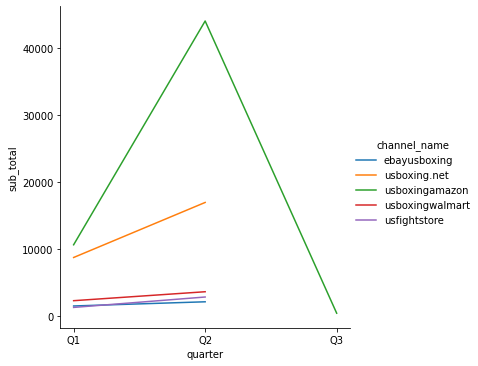

In [22]:
sns.relplot(
    data=shop_sales, x="quarter", y="sub_total",hue='channel_name',
    kind="line"
)

In [25]:
shop_orders=twenty_one.groupby(['channel_name','quarter'])['order_id'].count()
shop_orders=pd.DataFrame(shop_orders)
shop_orders.columns=['no_of_orders']

In [27]:
shop_orders.reset_index(inplace=True)

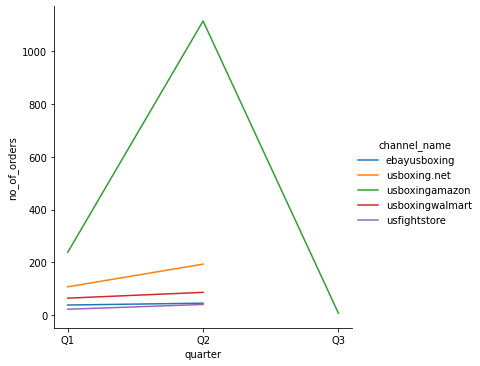

In [28]:
sns.relplot(
    data=shop_orders, x="quarter", y="no_of_orders",hue='channel_name',
    kind="line"
)

In [29]:
shop_sales_quarter=twenty_one.groupby(['channel_name','half_yearly'])['sub_total'].sum()
shop_sales_quarter=pd.DataFrame(shop_sales_quarter)

In [31]:
shop_sales_quarter.reset_index(inplace=True)

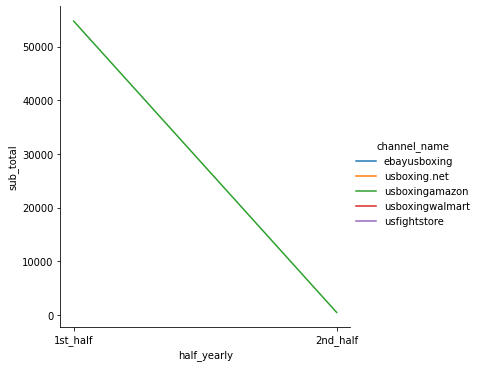

In [32]:
sns.relplot(
    data=shop_sales_quarter, x="half_yearly", y="sub_total",hue='channel_name',
    kind="line"
)

In [34]:
#2020
twenty_twenty=df_sales.query('year==2020')

In [35]:
conditions_twenty = [
    (twenty_twenty['month']>=1) & (twenty_twenty['month']<= 3),
    (twenty_twenty['month']>=4) & (twenty_twenty['month']<= 6),
    (twenty_twenty['month']>=7) & (twenty_twenty['month']<= 9),
    (twenty_twenty['month']>=10) & (twenty_twenty['month']<= 12)]
values_twenty = ['Q1', 'Q2', 'Q3', 'Q4']
import numpy as np
twenty_twenty['quarter'] = np.select(conditions_twenty, values_twenty)

<ipython-input-35-1487ab217cc6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_twenty['quarter'] = np.select(conditions_twenty, values_twenty)


In [36]:
conditions_2020_halfyearly = [
    (twenty_twenty['month']>=1) & (twenty_twenty['month'] <= 6),
    (twenty_twenty['month'] >=7) & (twenty_twenty['month'] <= 12)]
values_2020_half_yearly = ['1st_half', '2nd_half']
twenty_twenty['half_yearly'] = np.select(conditions_2020_halfyearly, values_2020_half_yearly)

<ipython-input-36-7ebdbd96cd4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_twenty['half_yearly'] = np.select(conditions_2020_halfyearly, values_2020_half_yearly)


In [37]:
shop_sales_twenty=twenty_twenty.groupby(['channel_name','quarter'])['sub_total'].sum()
shop_sales_twenty=pd.DataFrame(shop_sales_twenty)

In [38]:
shop_sales_twenty.reset_index(inplace=True)

In [39]:
shop_sales_twenty

,channel_name,quarter,sub_total
0,ebayusboxing,Q1,5295.61
1,ebayusboxing,Q2,10892.92
2,ebayusboxing,Q3,8247.29
3,ebayusboxing,Q4,4311.38
4,usboxing.net,Q1,9431.45
5,usboxing.net,Q2,14712.12
6,usboxing.net,Q3,8305.48
7,usboxing.net,Q4,8591.84
8,usboxingamazon,Q1,19913.21
9,usboxingamazon,Q2,21611.28


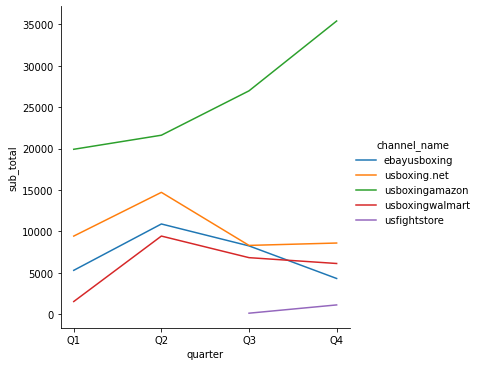

In [40]:
sns.relplot(
    data=shop_sales_twenty, x="quarter", y="sub_total",hue='channel_name',
    kind="line"
)

In [41]:
shop_sales_half_yearly=twenty_twenty.groupby(['channel_name','half_yearly'])['sub_total'].sum()
shop_sales_half_yearly=pd.DataFrame(shop_sales_half_yearly)

In [43]:
shop_sales_half_yearly.reset_index(inplace=True)

In [44]:
shop_sales_half_yearly

,channel_name,half_yearly,sub_total
0,ebayusboxing,1st_half,16188.53
1,ebayusboxing,2nd_half,12558.67
2,usboxing.net,1st_half,24143.57
3,usboxing.net,2nd_half,16897.32
4,usboxingamazon,1st_half,41524.49
5,usboxingamazon,2nd_half,62373.44
6,usboxingwalmart,1st_half,10960.98
7,usboxingwalmart,2nd_half,12947.67
8,usfightstore,2nd_half,1239.00


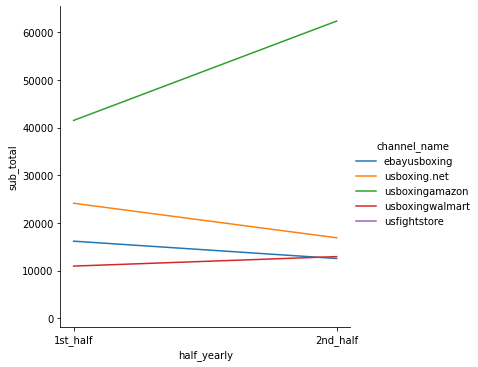

In [45]:
sns.relplot(
    data=shop_sales_half_yearly, x="half_yearly", y="sub_total",hue='channel_name',
    kind="line"
)

In [48]:
twenty_nineteen=df_sales.query('year==2019')

In [50]:
#2019
import seaborn as sns

conditions_2019_quarter = [
    (twenty_nineteen['month']>=1) & (twenty_nineteen['month']<= 3),
    (twenty_nineteen['month']>=4) & (twenty_nineteen['month']<= 6),
    (twenty_nineteen['month']>=7) & (twenty_nineteen['month']<= 9),
    (twenty_nineteen['month']>=10) & (twenty_nineteen['month']<= 12)]
values_q_2019 = ['Q1', 'Q2', 'Q3', 'Q4']
import numpy as np
twenty_nineteen['quarter'] = np.select(conditions_2019_quarter, values_q_2019)

<ipython-input-50-cda08ed5d5d1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_nineteen['quarter'] = np.select(conditions_2019_quarter, values_q_2019)


In [51]:
conditions_2019_halfyearly = [
    (twenty_nineteen['month']>=1) & (twenty_nineteen['month'] <= 6),
    (twenty_nineteen['month'] >=7) & (twenty_nineteen['month'] <= 12)]
values_2019_half_yearly = ['1st_half', '2nd_half']
twenty_nineteen['half_yearly'] = np.select(conditions_2019_halfyearly, values_2019_half_yearly)

<ipython-input-51-f28f8c58e188>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_nineteen['half_yearly'] = np.select(conditions_2019_halfyearly, values_2019_half_yearly)


In [52]:
shop_sales_2019=twenty_nineteen.groupby(['channel_name','quarter'])['sub_total'].sum()
shop_sales_2019=pd.DataFrame(shop_sales_2019)

In [53]:
shop_sales_2019.reset_index(inplace=True)

In [55]:
shop_sales_2019

,channel_name,quarter,sub_total
0,ebayusboxing,Q3,1718.67
1,ebayusboxing,Q4,3171.31
2,usboxing.net,Q3,3387.21
3,usboxing.net,Q4,8014.46
4,usboxingamazon,Q4,14047.70
5,usboxingwalmart,Q4,136.95


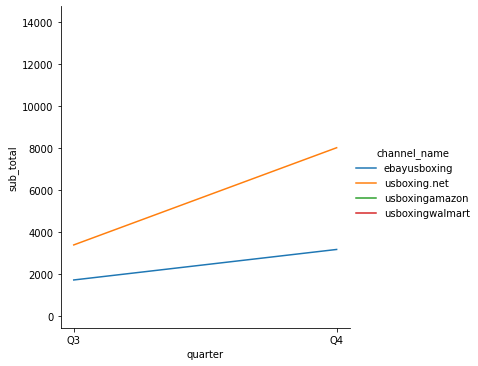

In [54]:
sns.relplot(
    data=shop_sales_2019, x="quarter", y="sub_total",hue='channel_name',
    kind="line"
)

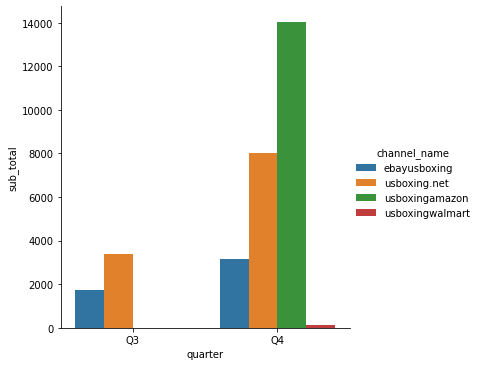

In [57]:
sns.catplot(x="quarter", y="sub_total",hue='channel_name',
    kind="bar",data=shop_sales_2019
)

In [58]:
sales_2019_half=twenty_one.groupby(['channel_name','half_yearly'])['sub_total'].sum()
sales_2019_half=pd.DataFrame(sales_2019_half)

In [60]:
sales_2019_half.reset_index(inplace=True)

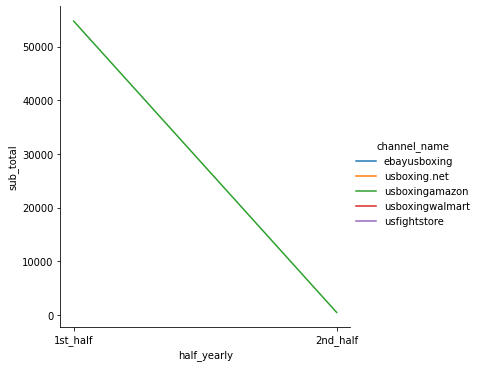

In [61]:
sns.relplot(
    data=sales_2019_half, x="half_yearly", y="sub_total",hue='channel_name',
    kind="line"
)

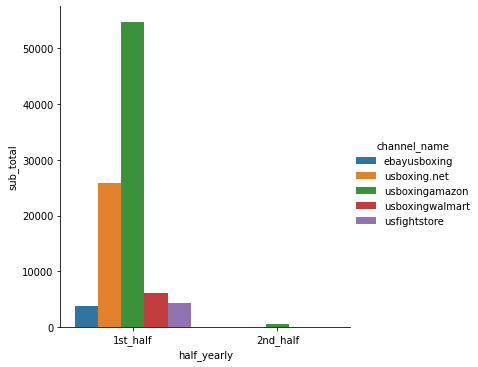

In [62]:
sns.catplot(x="half_yearly", y="sub_total",hue='channel_name',
    kind="bar",data=sales_2019_half
)